<h2>DATA SCIENCE IN PYTHON ASSIGNMENT 1</h2>
<h4>NOTEBOOK 2 (Task 2)</h4>
<p>Daniel Devlin</p>
<hr>

<p>Notebook 2 is where we get down to the nitty and the gritty. The Movies JSON file is loaded, pre-processing for various values in the JSON objects is done, and plots for various movie statistics are plotted. 
</p>

<h4>Import necessary modules</h4>


In [49]:
#Imports
import json
import pandas as pd

<h4>Open and load the JSON file</h4>

In [50]:
with open('top_50_movies.json', 'r') as f:
    data = json.load(f)

print(len(data)) #Verify that length is 50 as in 50 movies

50


<h4>Defining Functions to Convert Each Specific Movie Rating Score into a Uniform /100 Score</h4>

In [51]:
def imdb_convert(imdb_string):
    new_string = imdb_string.replace('.', '').replace('/10', '') #IMDB requires removing a period and /10
    imdb_score = int(new_string)
    return imdb_score

def rt_convert(rt_string):
    new_string = rt_string.replace('%', '') #Rotten Tomatoes requires removing a %
    rt_score = int(new_string)
    return rt_score

def meta_convert(meta_string):
    new_string = meta_string.replace("/100", '') #MetaCritic requires replacing /100
    meta_score = int(new_string)
    return meta_score

<h4>Loading Movie Titles and their respective converted Critic Rating Scores into a Pandas Dataframe</h4>

In [52]:
movie_titles = []
imdb_scores = []
rotten_scores = []
meta_scores = []
average_scores = []

for m in data:
    if(len(m['ratings']) == 3): #Only for the movies with ratings from all 3 critics (IMDB, Rotten Tomatoes, MetaCritic)
        movie_titles.append(m['title'])
        imdb_score = imdb_convert(m['ratings'][0]['Value'])
        imdb_scores.append(imdb_score)
        rt_score = rt_convert(m['ratings'][1]['Value'])
        rotten_scores.append(rt_score)
        meta_score = meta_convert(m['ratings'][2]['Value'])
        meta_scores.append(meta_score)
        average_scores.append(int((imdb_score + rt_score + meta_score)/3))

df = pd.DataFrame({'Top 10 Movies Ratings Compared': movie_titles, 'IMDB': imdb_scores, 'Rotten Tomatoes': rotten_scores, 'MetaCritic': meta_scores, 'Average': average_scores})

<h4>Below is a bar plot showing the top 10 of the 50 movies and their ratings from each critic along with an average for each. The ratings are all high for most part which is to be expected as these were the most popular movies of 2019. Clearly critics were not a fan of <em>Star Wars: Episode IX - The Rise of Skywalker</em> despite the popularity.</h4>

Text(0.5, 0, 'Top 10 Movies Ratings Compared')

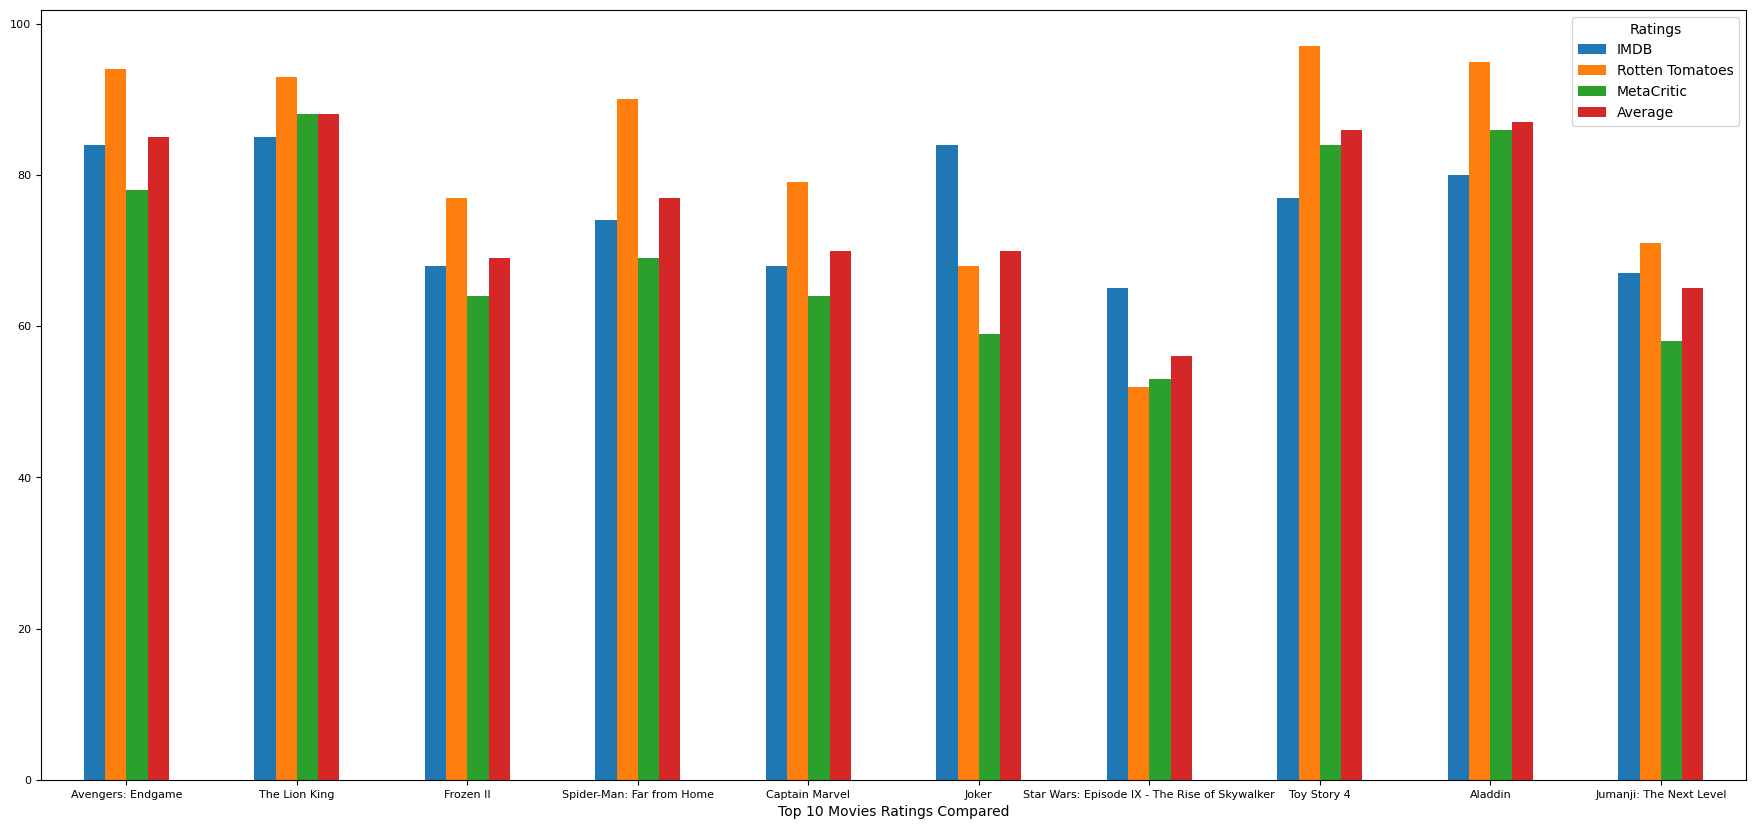

In [53]:
ax = df.head(10).plot.bar(x='Top 10 Movies Ratings Compared', rot=0, figsize=(22,10), fontsize=8)
ax.legend(title="Ratings")
ax.set_xlabel("Top 10 Movies Ratings Compared")

<h4>Below is a Bar Plot showing the Last 10 of the top 50 movies and their critics ratings along with an average. The averages are quite lower than the top 10 as seen in the above bar plot and this makes sense given that these were less popular movies in 2019.</h4>

Text(0.5, 0, 'Last 10 of Top 50 Movies Ratings Compared')

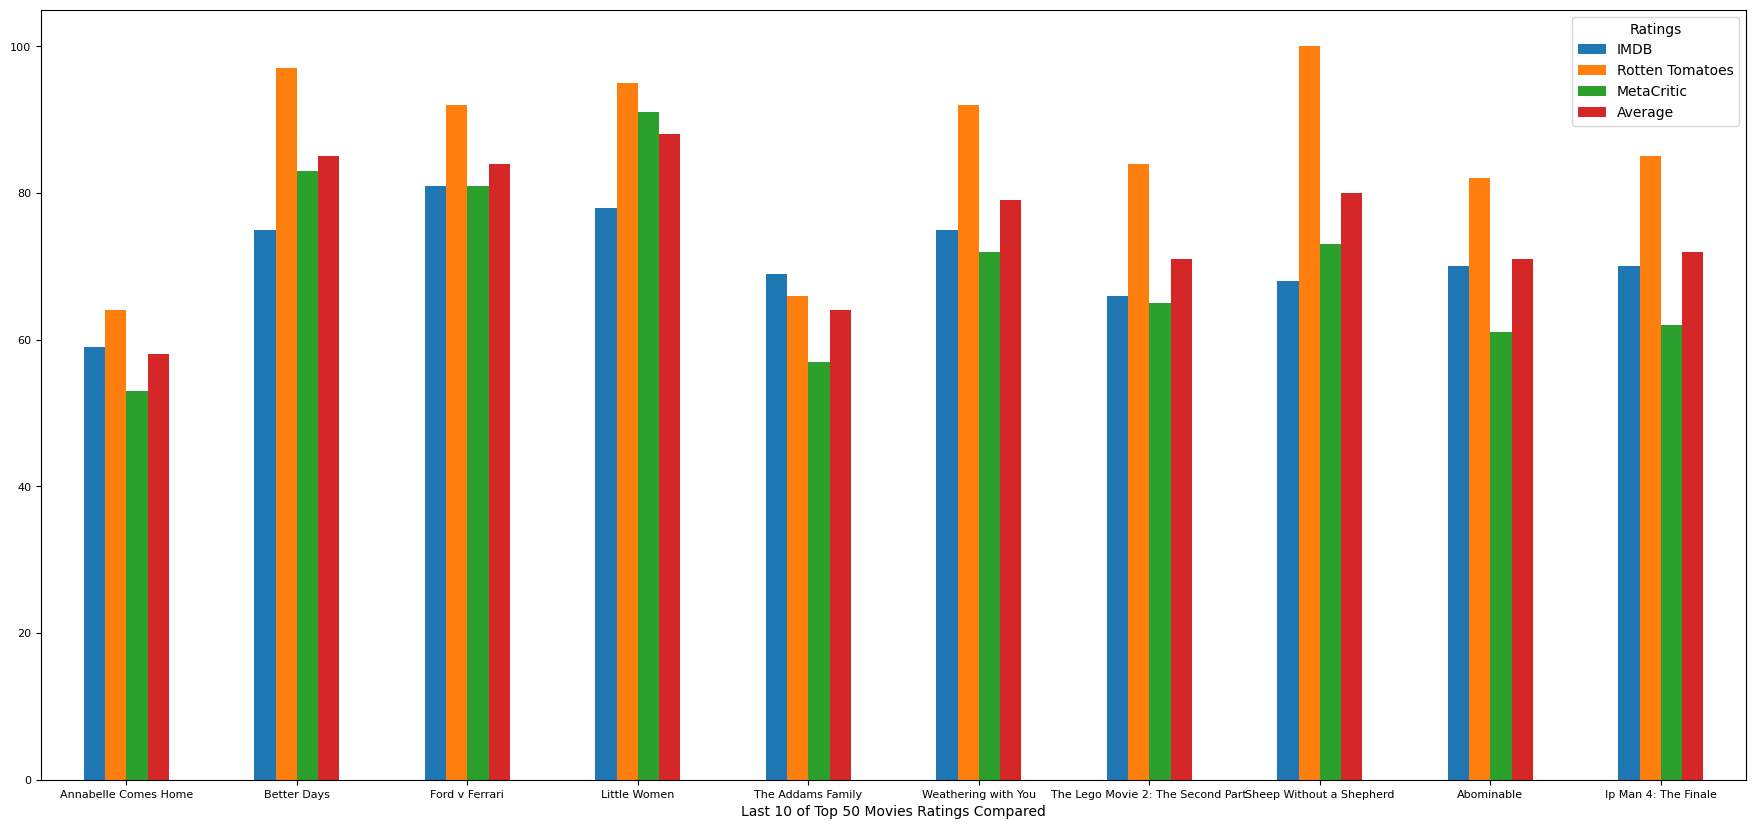

In [54]:
ax2= df.tail(10).plot.bar(x='Top 10 Movies Ratings Compared', rot=0, figsize=(22,10), fontsize=8)
ax2.legend(title="Ratings")
ax2.set_xlabel("Last 10 of Top 50 Movies Ratings Compared")

<h4>Identifying any actors who appeared in multiple Top 50 movies from 2019. Results show 7 actors who starred in at least 1 of these top 50.</h4>

In [55]:
#Loading all actors into a list
actors_table = [] 
for m in data: 
    actors_table.append(m['actors'])

#Splitting each actor 
split_list = []
for m in actors_table:
    split_list.append(m.split(','))

# Creating two new lists and adding an actor to one list if their name isn't present yet, if it is it adds that name to the duplicate list.
single_list = []
duplicate_list = []
for i in split_list:
    for x in i:
        if x not in single_list:
            single_list.append(x)
        elif x in duplicate_list: #Also checks duplicate list in case it is there already
            single_list.append(x)
        else:
            duplicate_list.append(x)

print("The Following Actors Appeared in Multiple Movies from the List of Top 50 from 2019: \n")
for m in duplicate_list:
    print(m.strip())


The Following Actors Appeared in Multiple Movies from the List of Top 50 from 2019: 

Samuel L. Jackson
Dwayne Johnson
Kevin Hart
Bo Huang
Chris Evans
James McAvoy
Zhuo Tan


<h4>Finding the Average Runtime of All the Movies in the List</h4>

In [56]:
# Average Runtime of all Movies
runtime_table = []

def remove_min(input_string):
    new_string = input_string.replace(' min', '')
    runtime_int = int(new_string)
    return runtime_int

for m in data:
    row = {"Movie": m['title'], "Runtime": remove_min(m['runtime'])}
    runtime_table.append(row)
df = pd.DataFrame(runtime_table).set_index("Movie")

print(df)
print("\nAverage Movie Runtime: ", int(df.mean(0)), "minutes.")

                                               Runtime
Movie                                                 
Avengers: Endgame                                  181
The Lion King                                       88
Frozen II                                          103
Spider-Man: Far from Home                          129
Captain Marvel                                     123
Joker                                              122
Star Wars: Episode IX - The Rise of Skywalker      141
Toy Story 4                                        100
Aladdin                                             90
Jumanji: The Next Level                            123
Fast & Furious Presents: Hobbs & Shaw              137
Ne Zha                                             110
The Wandering Earth                                125
How to Train Your Dragon: The Hidden World         104
Maleficent: Mistress of Evil                       119
It Chapter Two                                     169
My People,

<h4>Creating Lists of a specific range of movies where each one has a runtime, box office total, imdb/rotten tomatoes/metacritic score, and a movie rating. Loading values into each list with any conversions needed.</h4>

In [57]:
#Conversion for the Movies with Box Offices
runtimes = []
new_movie_titles = []
box_offices = []
new_imdb = []
new_rt = []
new_meta = []
ratings = []

def remove_money(input_money):
    new_value = input_money.replace('$', '').replace(",", '')
    money_int = int(new_value)
    return money_int

for m in data[:16]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[17:19]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[20:25]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[27:31]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[32:38]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[39:45]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])

for m in data[49:]:
    if(len(m['ratings']) == 3):
        new_movie_titles.append(m['title'])
        runtimes.append(remove_min(m['runtime']))
        box_offices.append(remove_money(m['boxoffice']))
        new_imdb.append(imdb_convert(m['ratings'][0]['Value']))
        new_rt.append(rt_convert(m['ratings'][1]['Value']))
        new_meta.append(meta_convert(m['ratings'][2]['Value']))
        ratings.append(m['rated'])


<h4>Creating a Pandas Dataframe of Box Office totals and Run Times then plotting those values on a scatter plot. Avengers:EndGame was the longesst movie of the list and also the highest earner which is quite interesting.</h4>

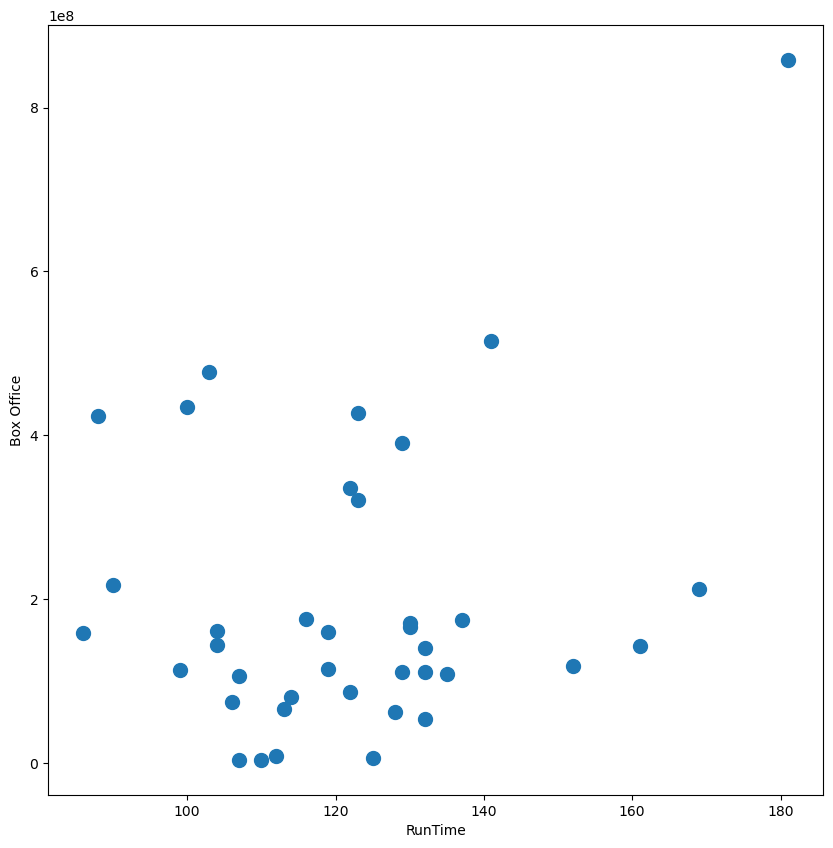

In [58]:
#Box Office Compared to Runtime

df = pd.DataFrame({'Movie List': new_movie_titles, 'Box Office': box_offices, 'RunTime': runtimes})

ax = df.plot.scatter(x='RunTime', y='Box Office', s=100, figsize=(10,10))

<h4>Box Office Compared To IMDB Score</h4>


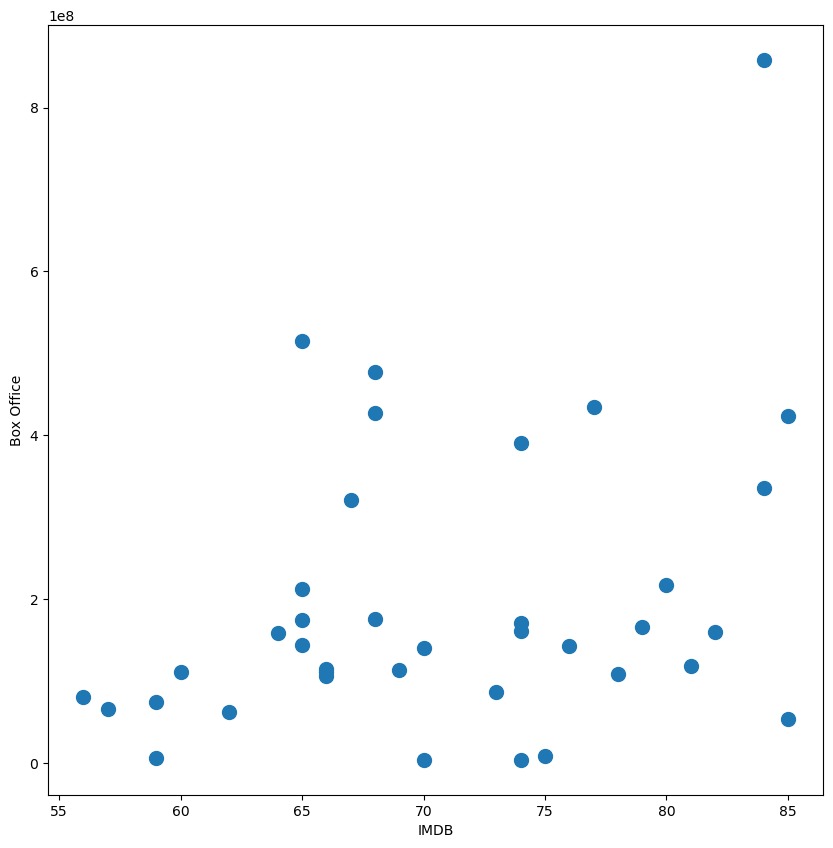

In [59]:
#IMDB
df = pd.DataFrame({'Movie List': new_movie_titles, 'Box Office': box_offices, 'IMDB': new_imdb})
ax = df.plot.scatter(x='IMDB', y='Box Office', s=100, figsize=(10,10))

<h4>Box Office Compared To Rotten Tomatoes Score</h4>


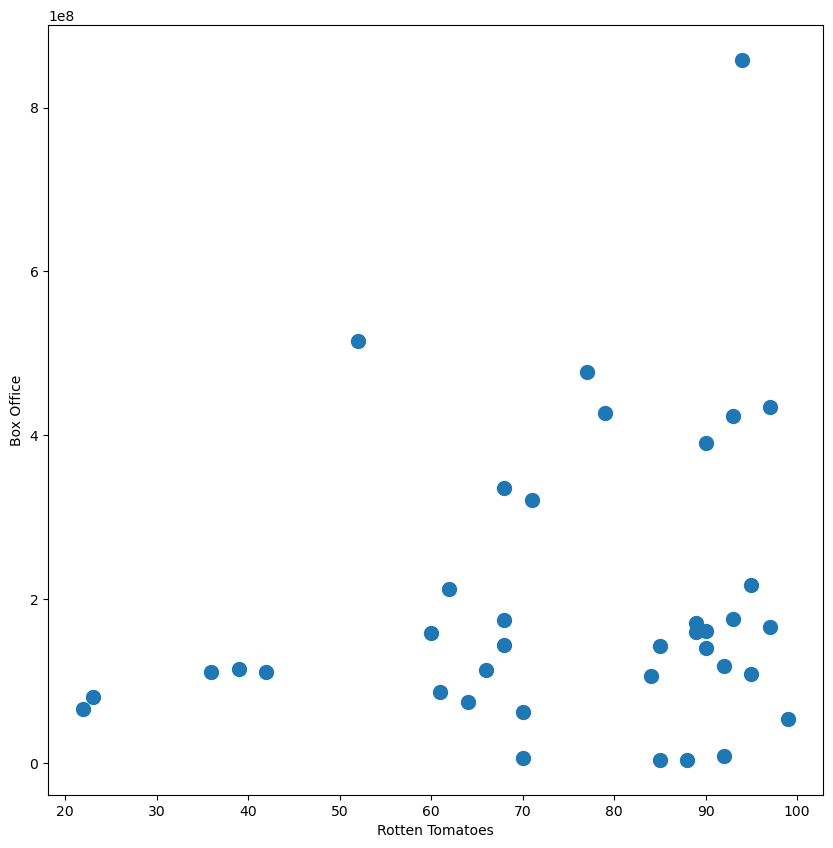

In [60]:
# Rotten
df = pd.DataFrame({'Movie List': new_movie_titles, 'Box Office': box_offices, 'Rotten Tomatoes': new_rt})
ax = df.plot.scatter(x='Rotten Tomatoes', y='Box Office', s=100, figsize=(10,10))


<h4>Box Office Compared To MetaCritic Score</h4>


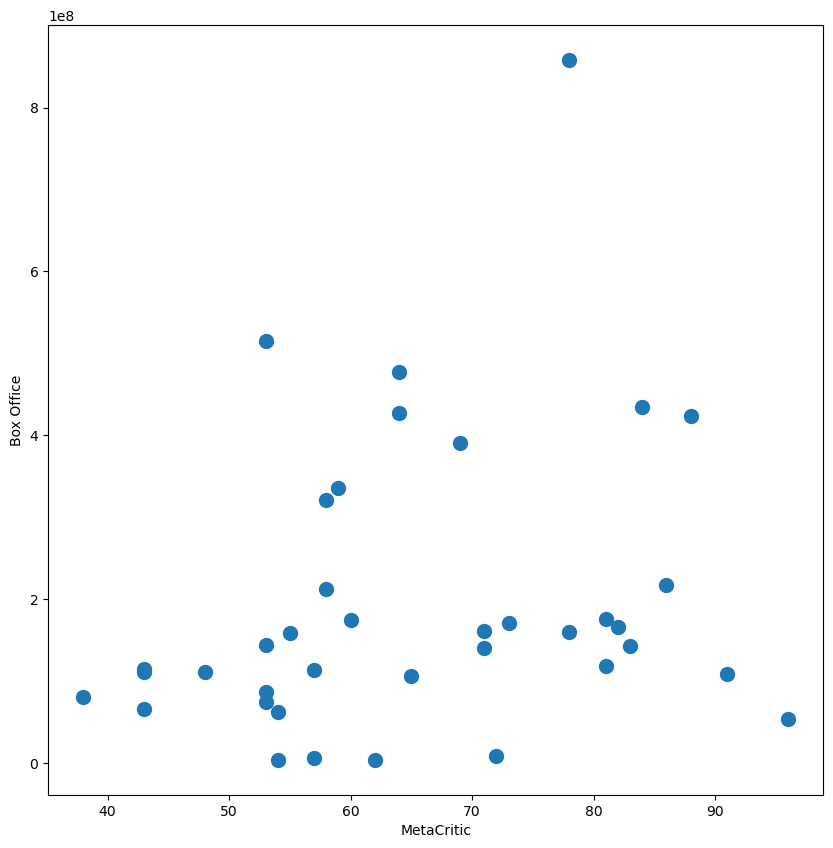

In [61]:
# Meta
df = pd.DataFrame({'Movie List': new_movie_titles, 'Box Office': box_offices, 'MetaCritic': new_meta})
ax = df.plot.scatter(x='MetaCritic', y='Box Office', s=100, figsize=(10,10))

<h4>Box Office Compared To Movie Rating</h4>


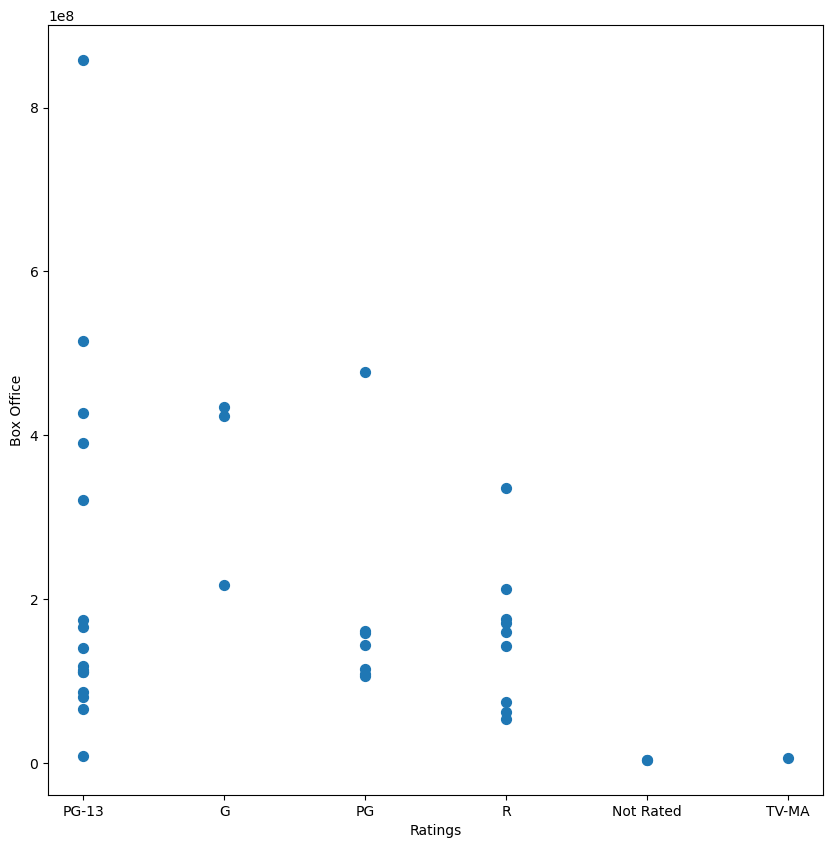

In [62]:
# Box Office Compared to Rated

df = pd.DataFrame({'Movie List': new_movie_titles, 'Box Office': box_offices, 'Ratings': ratings})
ax = df.plot.scatter(x='Ratings', y='Box Office', s=50, figsize=(10,10))

<h2>Task 3: Discussion and Conclusion</h2>

<p>
    When collecting the data from the Open Movie Database API at first I had an issue where it would load all 50 movies and their full JSON data, but the JSON file kept showing errors when I'd try to load it or even save it in VSCODE. Stupidly, I didn't look and see that it was simply just not seperating the JSON elements with commas or creating a JSON object with brackets. After adding brackets and a comma seperation, the file loaded all 50 movies and was easily parseable. 
</p>
<p>
    Something interesting I found while analyzing this data was that the most popular movie in 2019, <em>Avengers: Endgame</em> was not only the longest running movie of all 50 of these movies, but also the highest grossing. That really amazed me that so many people would pay to watch such a long movie. Another key insight I found was that often Rotten Tomatoes gave the highest rating, while MetaCritic gave the lowest ratings. 
</p>
<p>
    Something I intended on adding, but genuinely struggled with wrapping my head of how I'd implement it, was adding a feature to the cell where I find actors who had been in multiple movies. I wanted to add each movie they had been in individually but figuring out how to iteratively search that string through all 50 movies and attempt to grab each movie they appeared in was beyond my python skills for now. 
</p>